In [13]:
!pip install plotly.express

  Obtaining dependency information for plotly.express from https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl.metadata


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,f1_score

In [3]:
df = pd.read_csv('water_potability.csv')

In [4]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.dropna(how='all', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: >

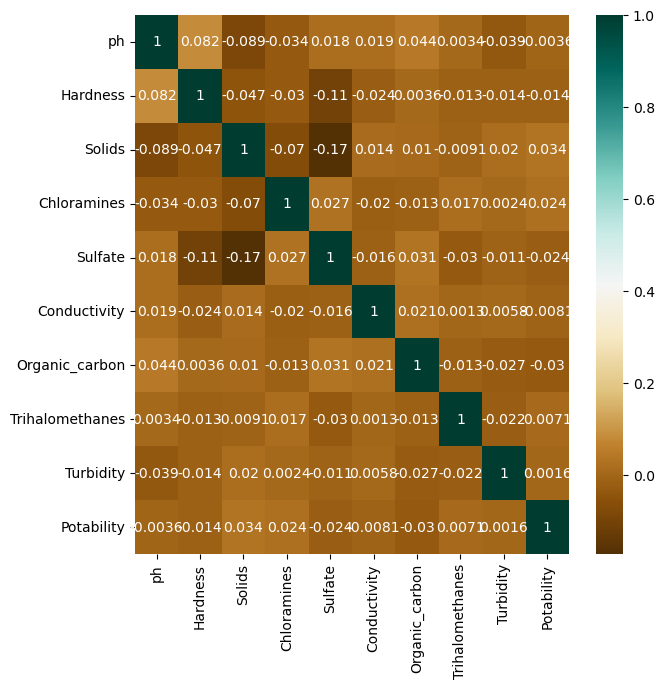

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(data=df.corr(), annot=True, cmap='BrBG')

In [10]:
idx1 = df.query('Potability == 1')['ph'][df.ph.isna()].index
df.loc[idx1, 'ph'] = df.query('Potability == 1')['ph'][df.ph.notna()].mean()

idx0 = df.query('Potability == 0')['ph'][df.ph.isna()].index
df.loc[idx0,'ph'] = df.query('Potability==0')['ph'][df.ph.notna()].mean()

idx1 = df.query('Potability == 1')['Sulfate'][df.Sulfate.isna()].index
df.loc[idx1, 'Sulfate'] = df.query('Potability == 1')['Sulfate'][df.Sulfate.notna()].mean()

idx0 = df.query('Potability == 0')['Sulfate'][df.Sulfate.isna()].index
df.loc[idx0,'Sulfate'] = df.query('Potability==0')['Sulfate'][df.Sulfate.notna()].mean()

idx1 = df.query('Potability == 1')['Trihalomethanes'][df.Trihalomethanes.isna()].index
df.loc[idx1, 'Trihalomethanes'] = df.query('Potability == 1')['Trihalomethanes'][df.Trihalomethanes.notna()].mean()

idx0 = df.query('Potability == 0')['Trihalomethanes'][df.Trihalomethanes.isna()].index
df.loc[idx0,'Trihalomethanes'] = df.query('Potability==0')['Trihalomethanes'][df.Trihalomethanes.notna()].mean()

df.loc[~df.ph.between(6.5, 8.5), 'Potability'] = 0


In [11]:
df2 = df.copy()

In [12]:
import plotly.express as px
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "count", names = ["Not Potable", "Potable"], hole = 0.4, opacity = 0.8,
             labels = {"label":"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

In [13]:
# Correlation Between Features

df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075878 -0.081887    -0.031827  0.014785   
Hardness         0.075878  1.000000 -0.046899    -0.030054 -0.092718   
Solids          -0.081887 -0.046899  1.000000    -0.070148 -0.149809   
Chloramines     -0.031827 -0.030054 -0.070148     1.000000  0.023490   
Sulfate          0.014785 -0.092718 -0.149809     0.023490  1.000000   
Conductivity     0.017205 -0.023915  0.013831    -0.020486 -0.014196   
Organic_carbon   0.040092  0.003610  0.010242    -0.012653  0.027403   
Trihalomethanes  0.003009 -0.012718 -0.008849     0.016615 -0.025797   
Turbidity       -0.036211 -0.014449  0.019546     0.002363 -0.009523   
Potability       0.085469  0.013256  0.035116     0.032758 -0.060097   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017205        0.040092         0.003009  -0.036211   
Hardness            -0.023915        0.003610        -0.012718  -0.014449   
Solids               0.013831        0.010242        -0.008849   0.019546   
Chloramines         -0.020486       -0.012653         0.016615   0.002363   
Sulfate             -0.014196        0.027403        -0.025797  -0.009523   
Conductivity         1.000000        0.020966         0.001238   0.005798   
Organic_carbon       0.020966        1.000000        -0.012944  -0.027308   
Trihalomethanes      0.001238       -0.012944         1.000000  -0.021540   
Turbidity            0.005798       -0.027308        -0.021540   1.000000   
Potability          -0.015683       -0.010212         0.005678   0.013893   

                 Potability  
ph                 0.085469  
Hardness           0.013256  
Solids             0.035116  
Chloramines        0.032758  
Sulfate           -0.060097  
Conductivity      -0.015683  
Organic_carbon    -0.010212  
Trihalomethanes    0.005678  
Turbidity          0.013893  
Potability         1.000000

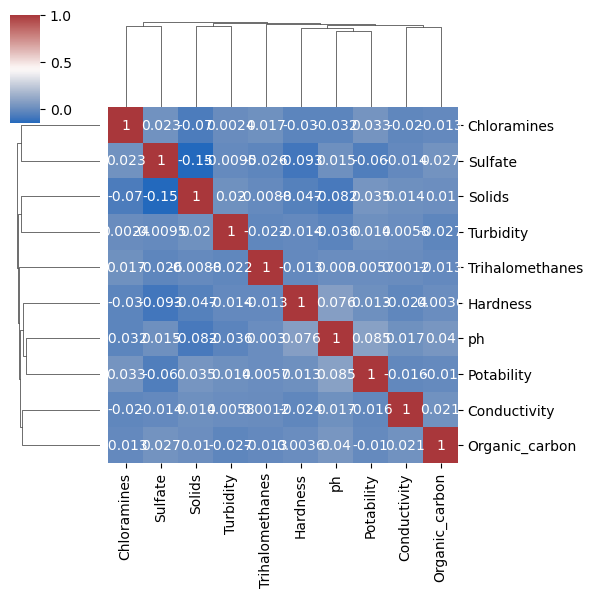

In [14]:
sns.clustermap(df.corr(), cmap = "vlag", annot = True, figsize = (6,6))
plt.show()

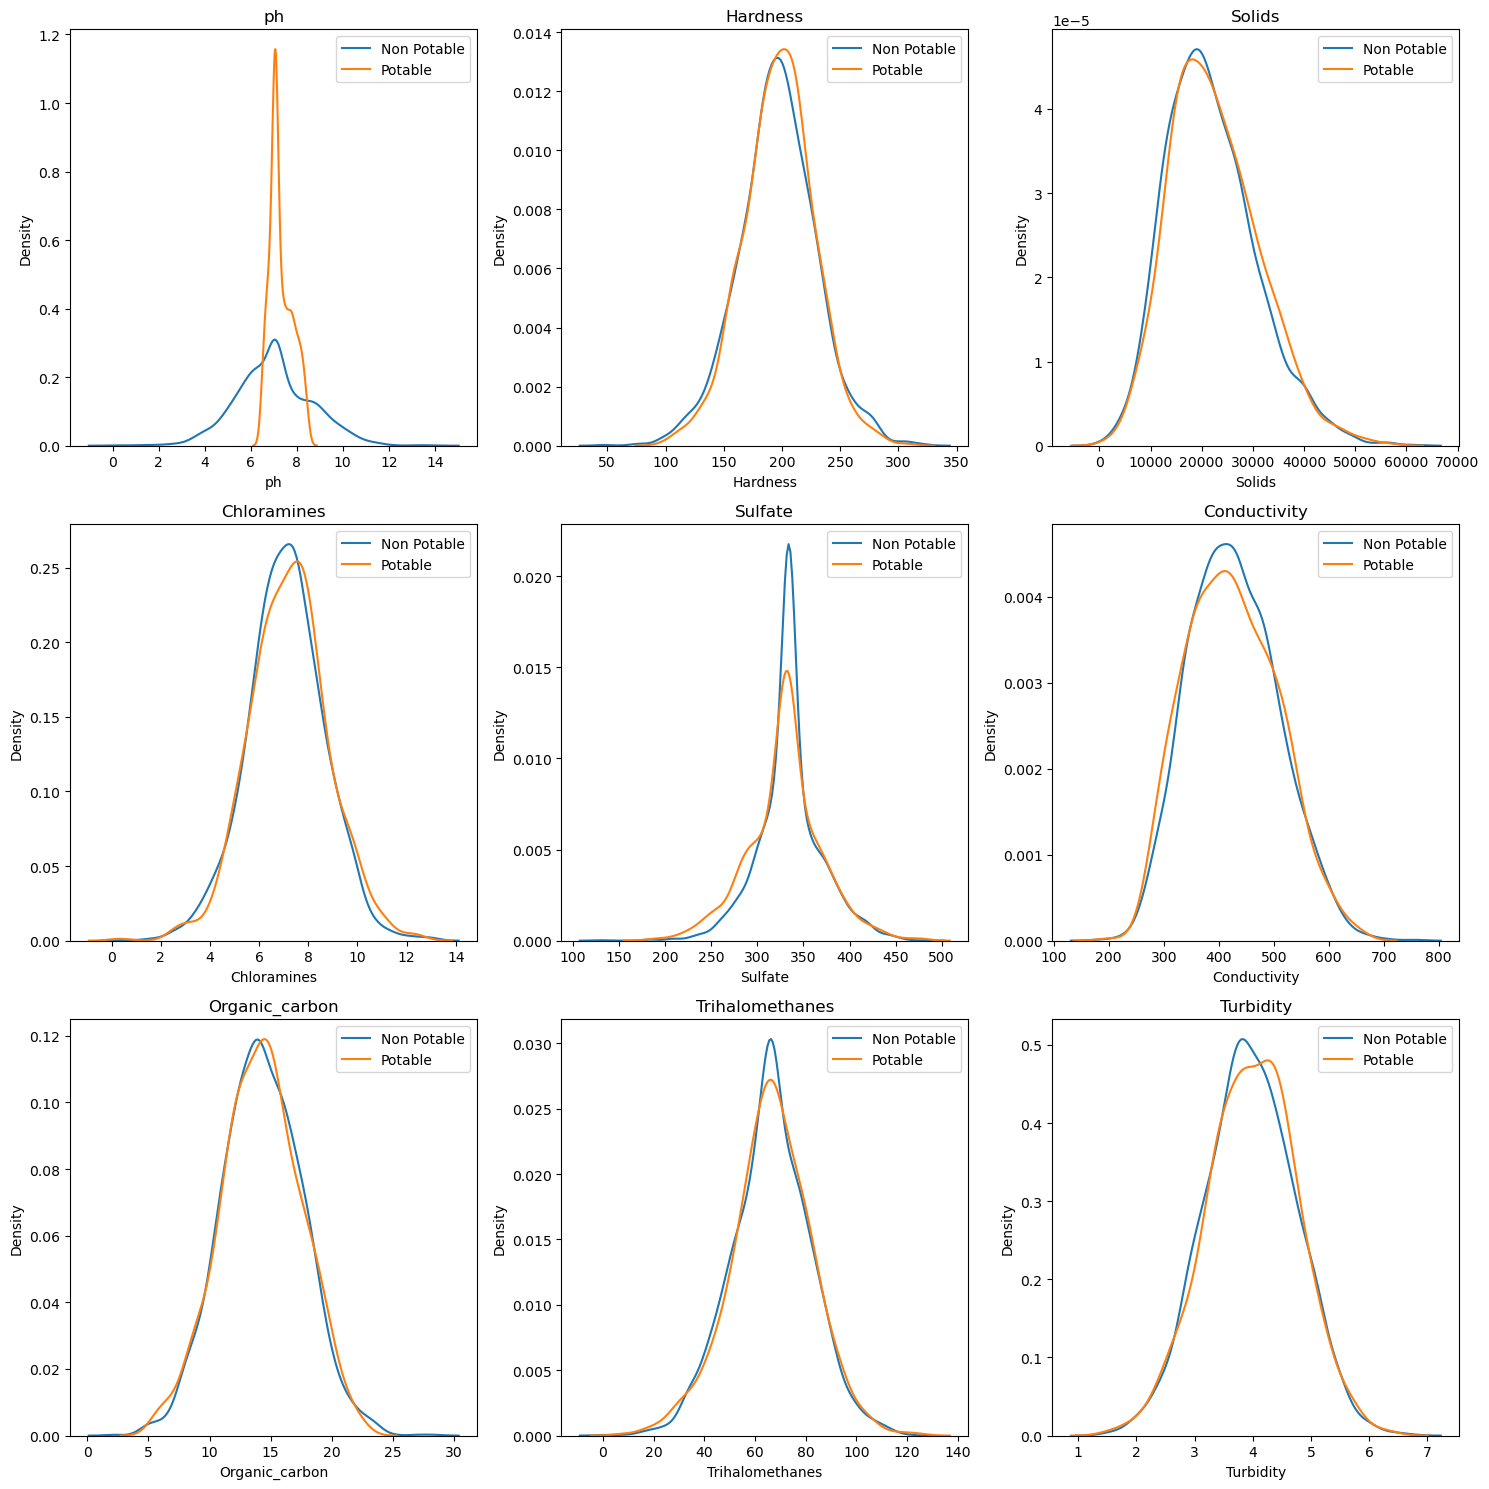

In [15]:
# Distrubition of Features

from warnings import filterwarnings
filterwarnings('ignore')

non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()

plt.tight_layout()

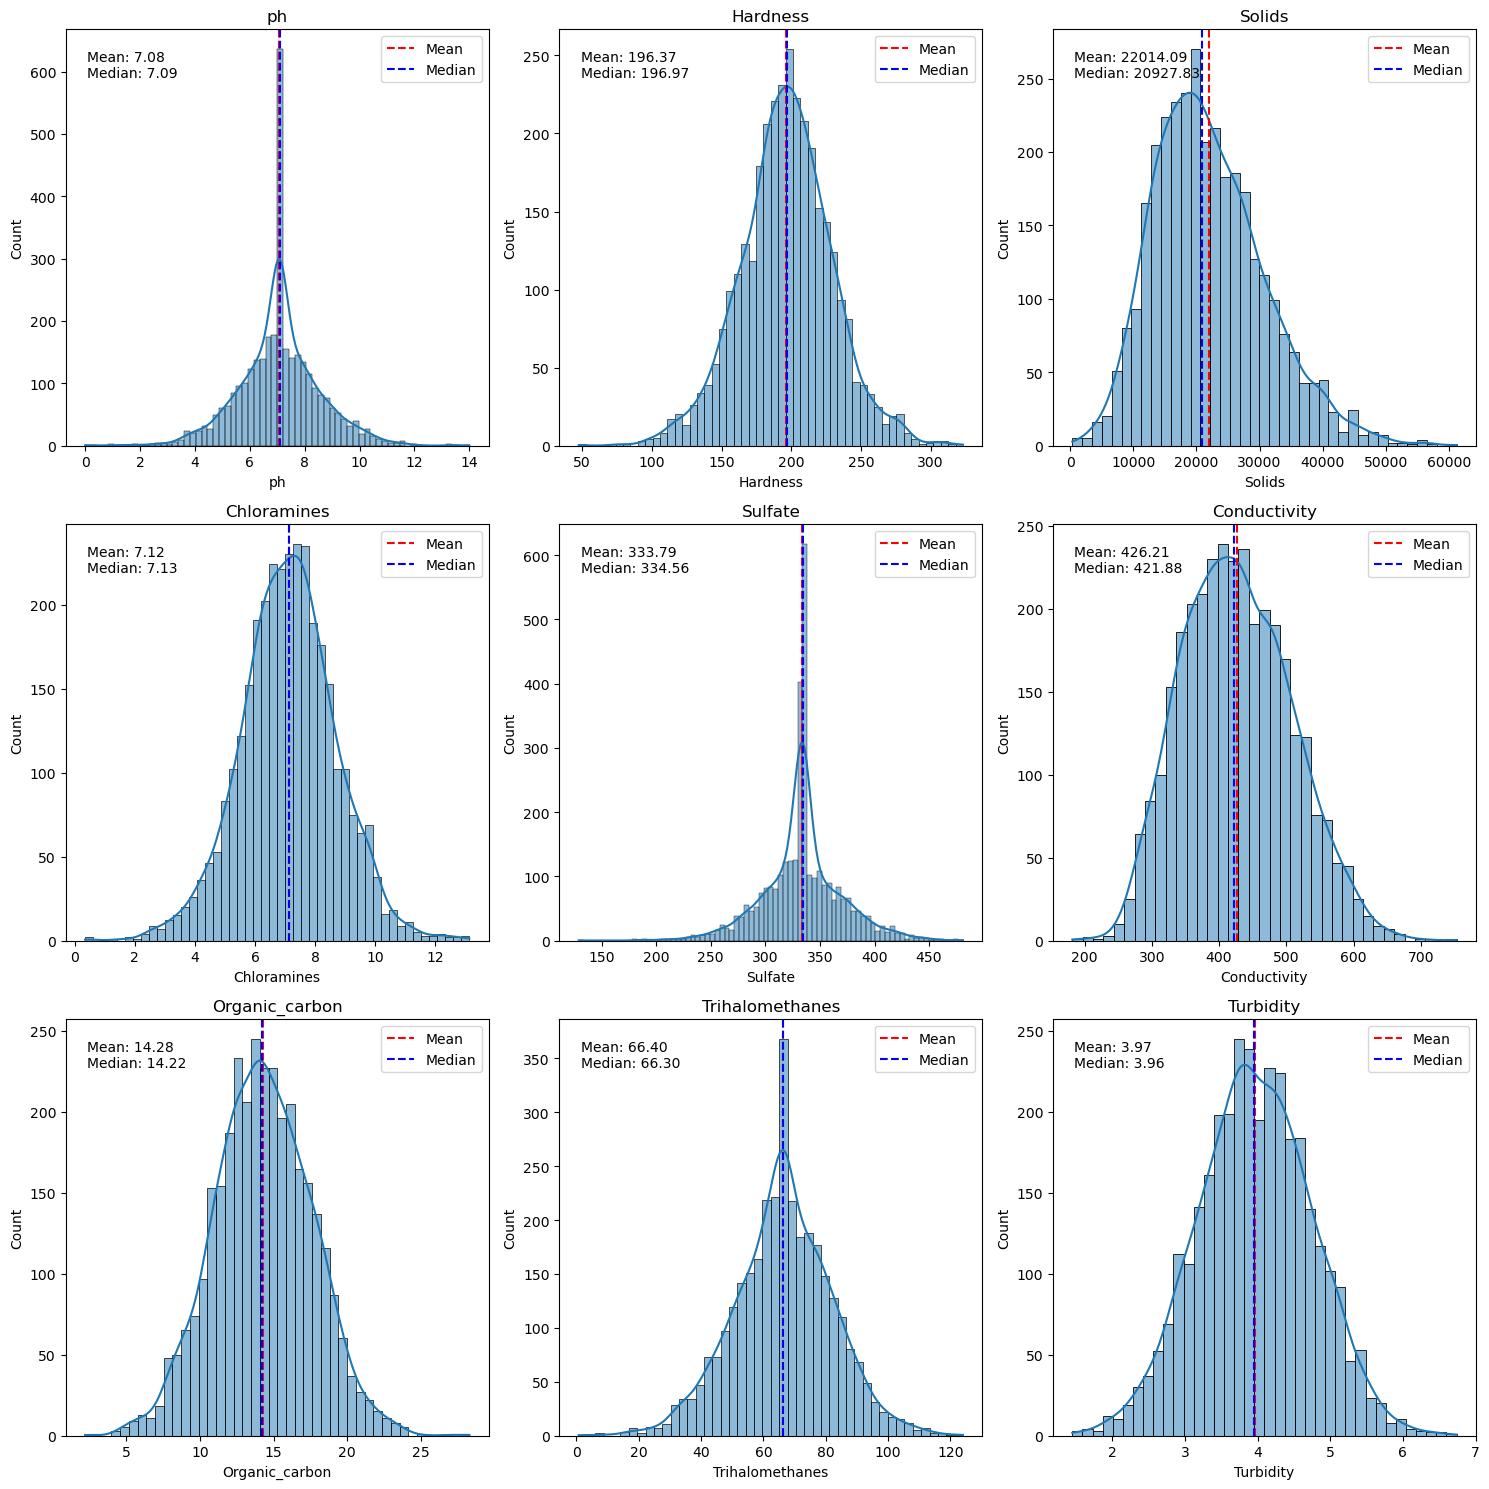

In [16]:
variables = df.columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

axes = axes.flatten()

for i, var in enumerate(variables):
  if(var != 'Potability'):
    ax = axes[i]
    sns.histplot(df[var], kde=True, ax=ax)
    ax.axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[var].median(), color='blue', linestyle='--', label='Median')
    ax.annotate(f'Mean: {df[var].mean():.2f}\nMedian: {df[var].median():.2f}',
                xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

    ax.set_title(var)
    ax.set_xlabel(var)
    ax.legend() 

plt.tight_layout()
plt.show()

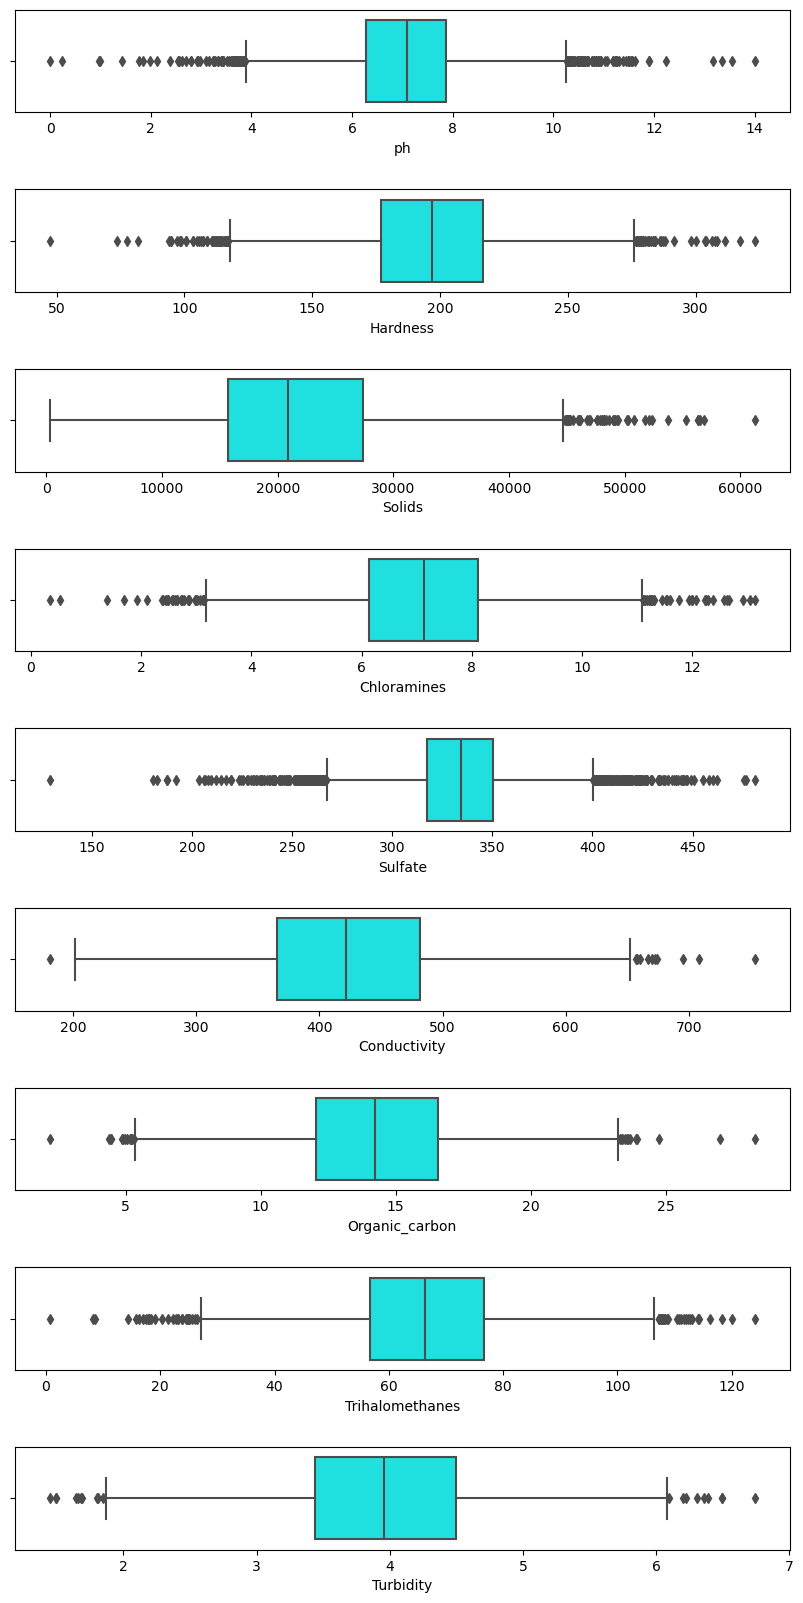

In [17]:
columns = df.columns

fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i,col in enumerate(columns):
    if col != 'Potability':
        sns.boxplot(x=col, data=df, ax=ax[i] , color = 'cyan')
plt.show()

In [18]:
x=df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

y=df['Potability']

In [19]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float64)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=20,random_state = 42)

In [21]:
sta = StandardScaler()
x_train = sta.fit_transform(x_train)
x_test = sta.transform(x_test)

In [22]:
models={
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "Gradient boost":GradientBoostingClassifier(),
    "MLP ":MLPClassifier() }

for i in range(len(list(models))):
       
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #train
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_gini=gini(y_train,y_train_pred)

    #test
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_gini=gini(y_test,y_test_pred)


    print(list(models.keys())[i])
    print('-----------------------------------------')
    print("Model Performance for Training DataSet")
    print("accuracy : ",(model_train_accuracy))
    print('f1 score : ',(model_train_f1))
    print('precision : ',(model_train_precision))
    print('recall : ',(model_train_recall))
    print('Gini Index : ',(model_train_gini))

    print('-----------------------------------------')

    print("Model Performance for Test DataSet")
    print("accuracy : ",(model_test_accuracy))
    print('f1 score : ',(model_test_f1))
    print('precision : ',(model_test_precision))
    print('recall : ',(model_test_recall))
    print('Gini Index : ',(model_test_gini))
    print('-----------------------------------------')

    print('\n')

Decision Tree
-----------------------------------------
Model Performance for Training DataSet
accuracy :  1.0
f1 score :  1.0
precision :  1.0
recall :  1.0
Gini Index :  0.38390663390663393
-----------------------------------------
Model Performance for Test DataSet
accuracy :  0.8
f1 score :  0.8
precision :  0.5
recall :  0.5
Gini Index :  0.15
-----------------------------------------


Random Forest
-----------------------------------------
Model Performance for Training DataSet
accuracy :  1.0
f1 score :  1.0
precision :  1.0
recall :  1.0
Gini Index :  0.38390663390663393
-----------------------------------------
Model Performance for Test DataSet
accuracy :  0.85
f1 score :  0.8114285714285714
precision :  1.0
recall :  0.25
Gini Index :  0.075
-----------------------------------------


Adaboost
-----------------------------------------
Model Performance for Training DataSet
accuracy :  0.8848280098280098
f1 score :  0.8817149803160007
precision :  0.7926267281105991
recall :

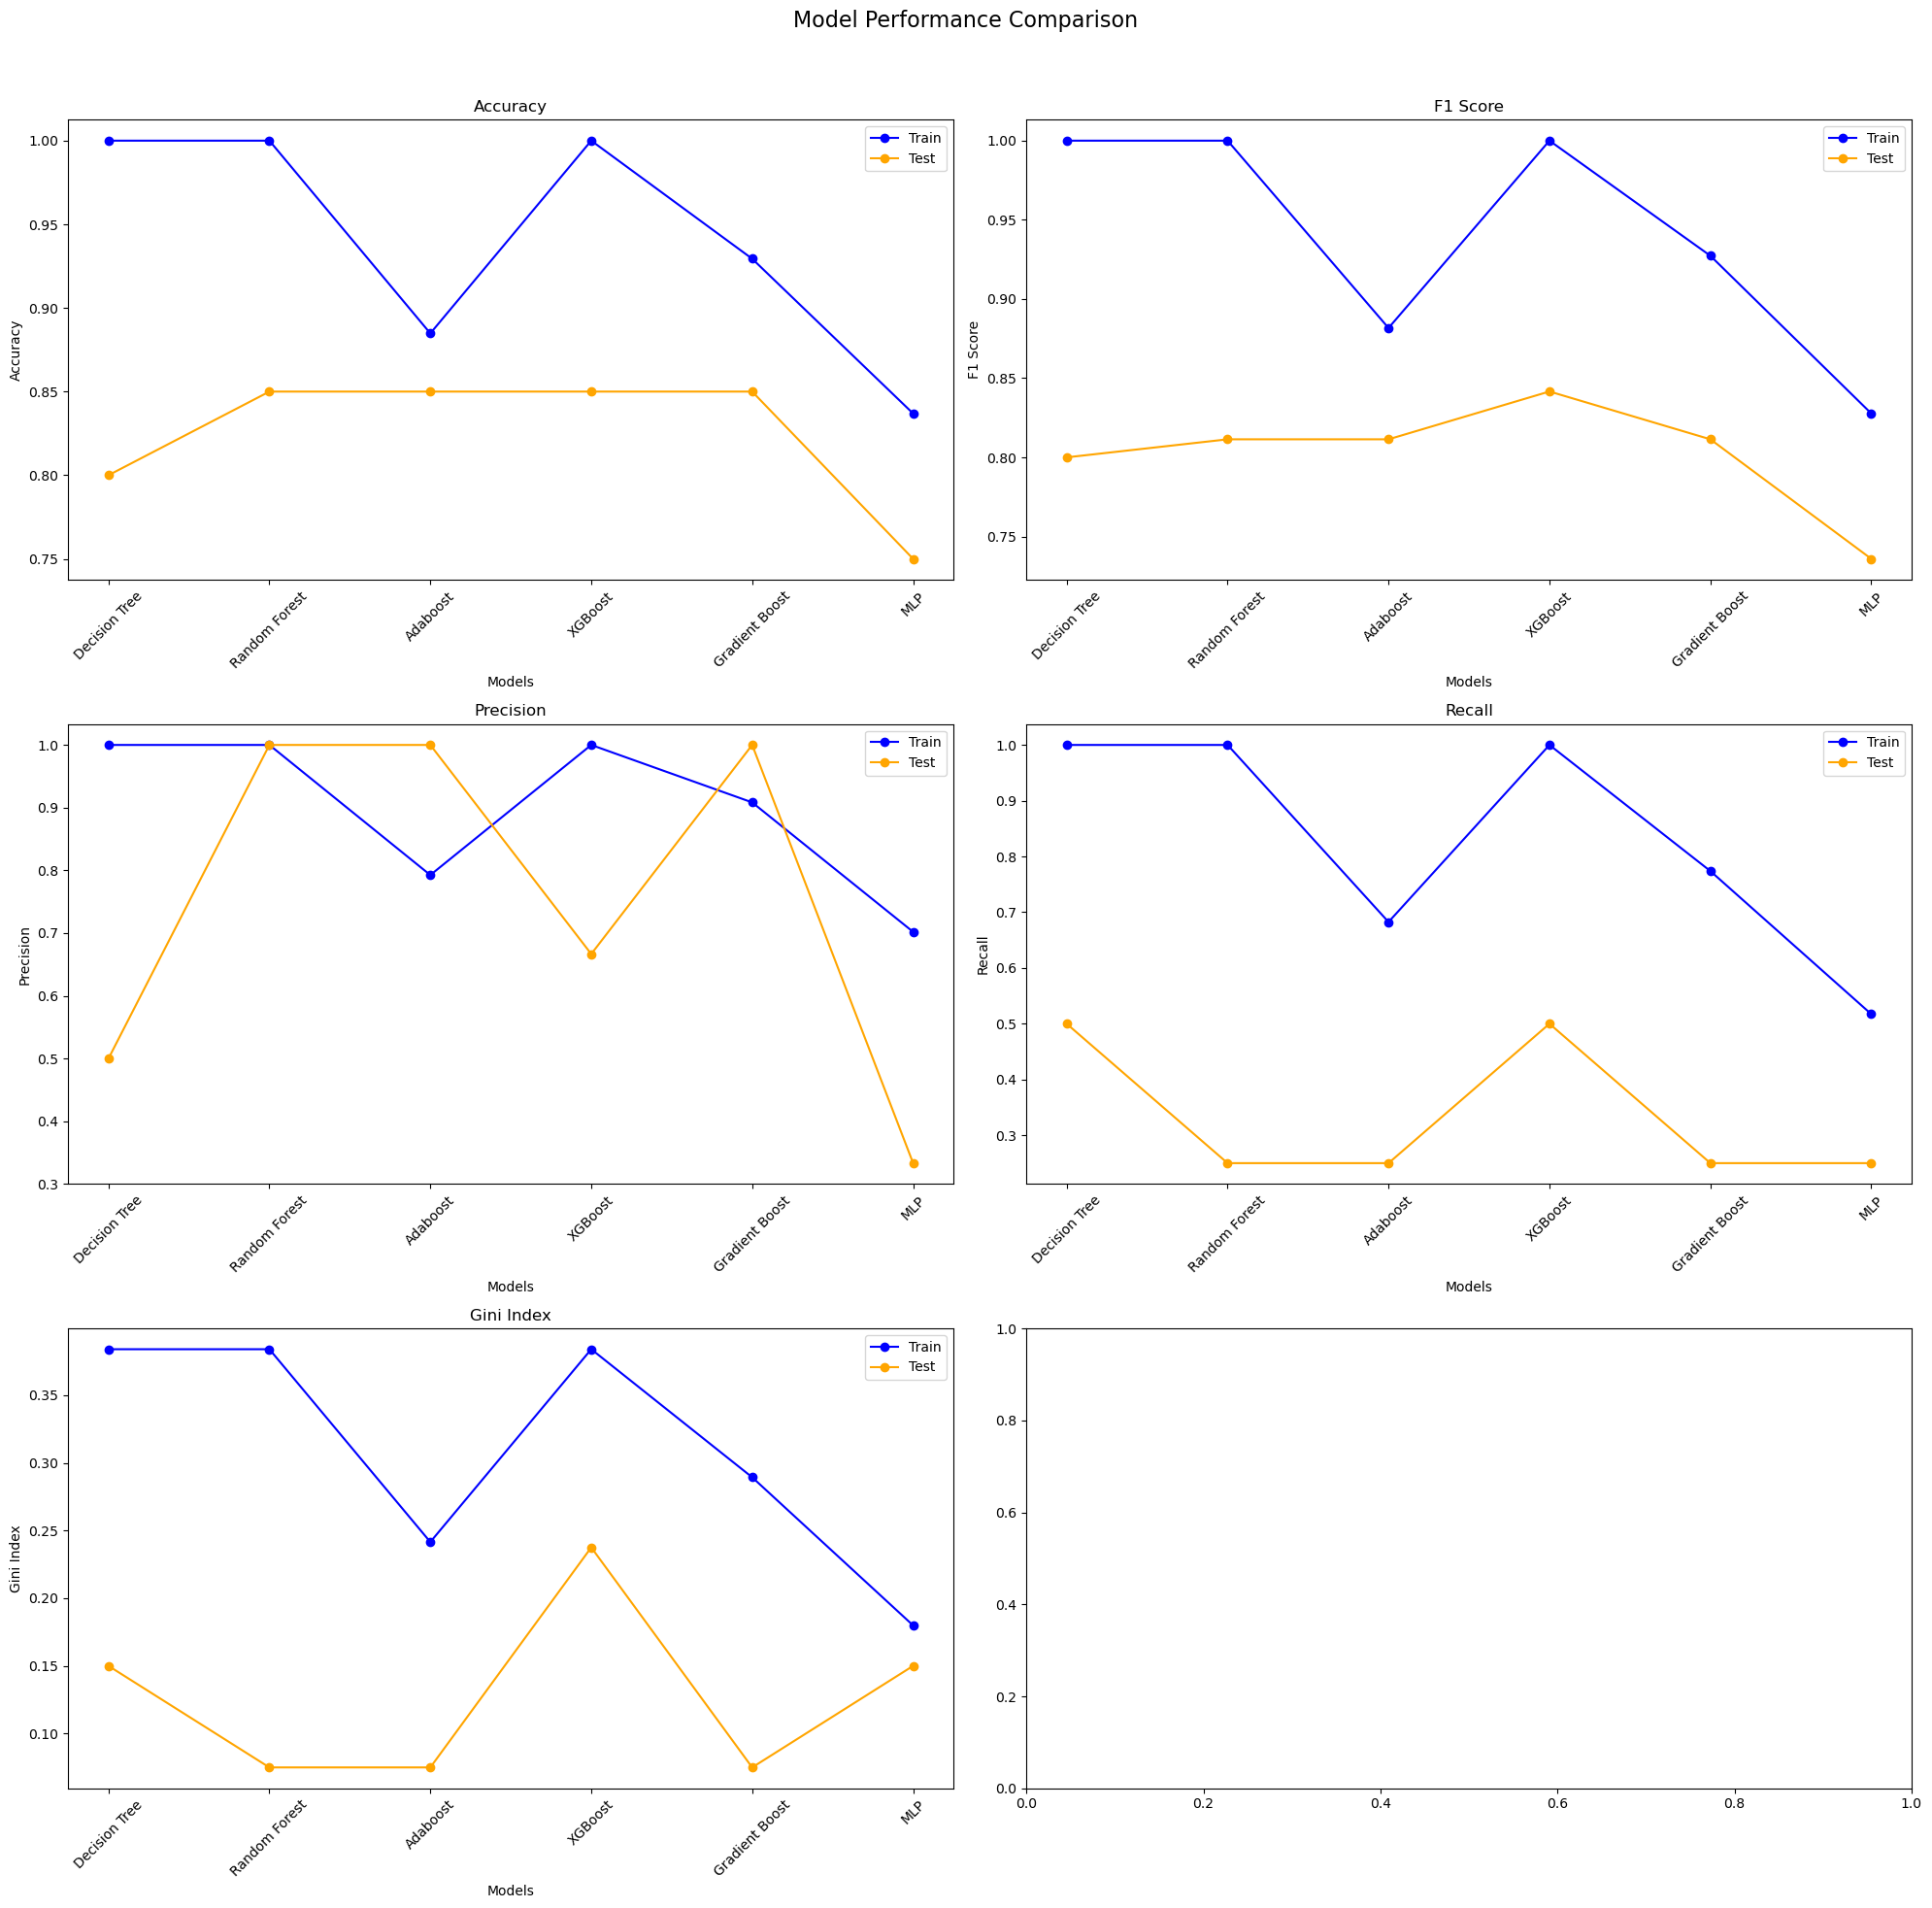

In [23]:
import matplotlib.pyplot as plt

# Model names and metrics based on provided data
model_names = ["Decision Tree", "Random Forest", "Adaboost", "XGBoost", "Gradient Boost", "MLP"]
train_accuracies = [1.0, 1.0, 0.8848, 1.0, 0.9294, 0.8369]
test_accuracies = [0.8, 0.85, 0.85, 0.85, 0.85, 0.75]
train_f1_scores = [1.0, 1.0, 0.8817, 1.0, 0.9273, 0.8277]
test_f1_scores = [0.8, 0.8114, 0.8114, 0.8416, 0.8114, 0.7359]
train_precisions = [1.0, 1.0, 0.7926, 1.0, 0.9084, 0.7020]
test_precisions = [0.5, 1.0, 1.0, 0.6667, 1.0, 0.3333]
train_recalls = [1.0, 1.0, 0.6825, 1.0, 0.7738, 0.5172]
test_recalls = [0.5, 0.25, 0.25, 0.5, 0.25, 0.25]
train_ginis = [0.3839, 0.3839, 0.2415, 0.3839, 0.2893, 0.1799]
test_ginis = [0.15, 0.075, 0.075, 0.2375, 0.075, 0.15]

# Plotting each metric
metrics = {
    'Accuracy': (train_accuracies, test_accuracies),
    'F1 Score': (train_f1_scores, test_f1_scores),
    'Precision': (train_precisions, test_precisions),
    'Recall': (train_recalls, test_recalls),
    'Gini Index': (train_ginis, test_ginis)
}

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.suptitle("Model Performance Comparison", fontsize=16)

# Plot each metric
for ax, (metric, (train_metric, test_metric)) in zip(axes.flat, metrics.items()):
    ax.plot(model_names, train_metric, label="Train", marker='o', color='blue')
    ax.plot(model_names, test_metric, label="Test", marker='o', color='orange')
    ax.set_title(metric)
    ax.set_xlabel("Models")
    ax.set_ylabel(metric)
    ax.set_xticklabels(model_names, rotation=45)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


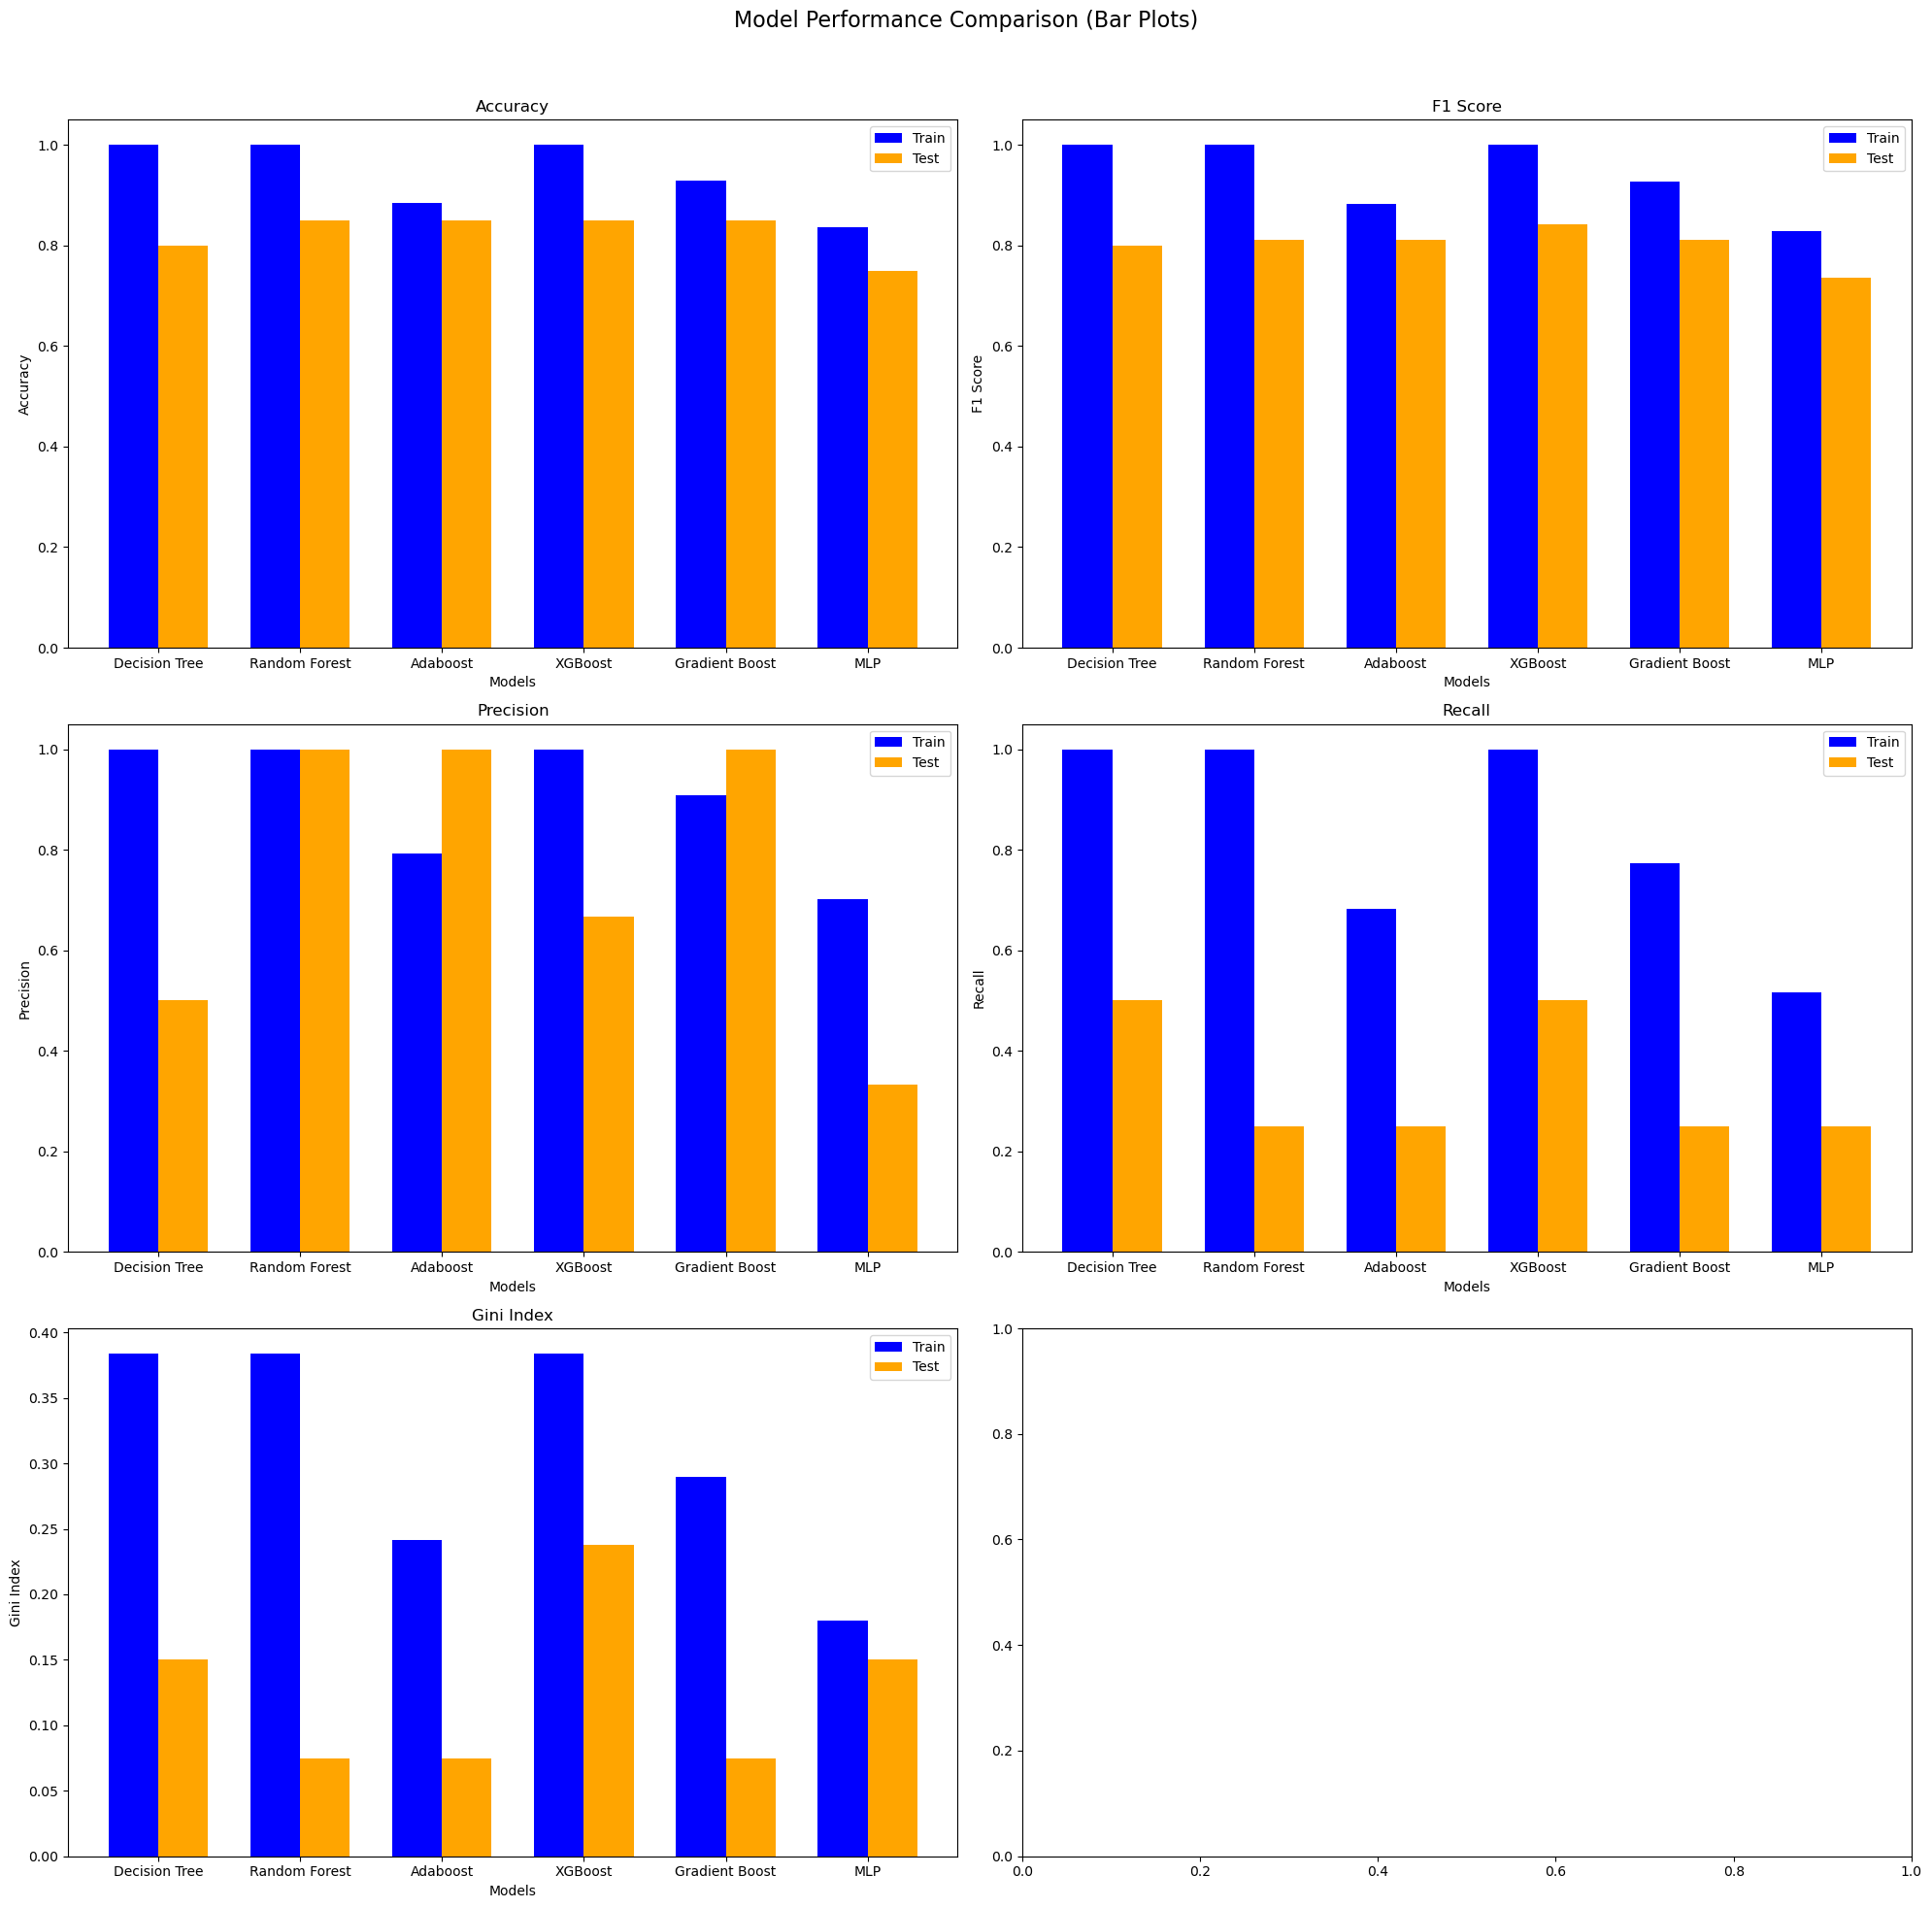

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics based on provided data
model_names = ["Decision Tree", "Random Forest", "Adaboost", "XGBoost", "Gradient Boost", "MLP"]
train_accuracies = [1.0, 1.0, 0.8848, 1.0, 0.9294, 0.8369]
test_accuracies = [0.8, 0.85, 0.85, 0.85, 0.85, 0.75]
train_f1_scores = [1.0, 1.0, 0.8817, 1.0, 0.9273, 0.8277]
test_f1_scores = [0.8, 0.8114, 0.8114, 0.8416, 0.8114, 0.7359]
train_precisions = [1.0, 1.0, 0.7926, 1.0, 0.9084, 0.7020]
test_precisions = [0.5, 1.0, 1.0, 0.6667, 1.0, 0.3333]
train_recalls = [1.0, 1.0, 0.6825, 1.0, 0.7738, 0.5172]
test_recalls = [0.5, 0.25, 0.25, 0.5, 0.25, 0.25]
train_ginis = [0.3839, 0.3839, 0.2415, 0.3839, 0.2893, 0.1799]
test_ginis = [0.15, 0.075, 0.075, 0.2375, 0.075, 0.15]

# Plotting each metric
metrics = {
    'Accuracy': (train_accuracies, test_accuracies),
    'F1 Score': (train_f1_scores, test_f1_scores),
    'Precision': (train_precisions, test_precisions),
    'Recall': (train_recalls, test_recalls),
    'Gini Index': (train_ginis, test_ginis)
}

# Setting up bar plot parameters
x = np.arange(len(model_names))  # Label locations
width = 0.35  # Width of the bars

# Create a 3x2 grid of subplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.suptitle("Model Performance Comparison (Bar Plots)", fontsize=16)

# Plot each metric as a bar plot
for ax, (metric, (train_metric, test_metric)) in zip(axes.flat, metrics.items()):
    ax.bar(x - width/2, train_metric, width, label="Train", color='blue')
    ax.bar(x + width/2, test_metric, width, label="Test", color='orange')
    ax.set_title(metric)
    ax.set_xlabel("Models")
    ax.set_ylabel(metric)
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=0)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


In [77]:
import pickle
filename = 'xgboost.sav'
pickle.dump('XGBoost', open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open('xgboost.sav', 'rb'))

In [79]:
filename = 'scaler.sav'
pickle.dump(sta, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
scc = pickle.load(open('scaler.sav', 'rb'))

In [80]:

import pickle
loaded_model = pickle.load(open('xgboost.sav', 'rb'))
scc = pickle.load(open('scaler.sav', 'rb'))


In [81]:
data = df.iloc[3:4, :-1].values

In [82]:
data


array([[8.31676588e+00, 2.14373394e+02, 2.20184174e+04, 8.05933238e+00,
        3.56886136e+02, 3.63266516e+02, 1.84365245e+01, 1.00341674e+02,
        4.62877054e+00]])

In [83]:
sc_data = scc.transform(data)


In [84]:
sc_data


array([[ 8.44571773e-01,  5.46885116e-01, -7.29914495e-04,
         5.93200842e-01,  6.37190970e-01, -7.77130288e-01,
         1.25521853e+00,  2.15104617e+00,  8.49952924e-01]])

In [85]:
loaded_model.predict(sc_data)

AttributeError: 'str' object has no attribute 'predict'

In [2]:
import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

NameError: name 'model' is not defined